Import



In [3]:
import mysql.connector
from mysql.connector import Error


Nom DB : 

user : aless

password : farajallah

In [36]:
import csv

# Ouvre le fichier CSV en lecture
with open('test.csv', 'r',encoding='UTF8') as file:
  # Crée un objet reader pour lire le fichier CSV
  reader = csv.reader(file)
  # Crée une liste pour stocker les lignes du fichier
  rows = []
  # Pour chaque ligne du fichier CSV
  for row in reader:
    # Enleve la colonne à supprimer
    del row[0]
    # Ajoute la ligne modifiée à la liste
    rows.append(row)

# Ouvre le fichier CSV en écriture
with open('test.csv', 'w', encoding='UTF8',newline='') as file:
  # Crée un objet writer pour écrire dans le fichier CSV
  writer = csv.writer(file)
  # Écrit chaque ligne de la liste dans le fichier CSV
  for row in rows:
    writer.writerow(row)


In [9]:
import pandas as pd
scanData = pd.read_csv('test.csv', index_col=False, delimiter = ',')
scanData.head()

try:
    conn = mysql.connector.connect(host='192.168.45.139', database='db_scan', user='root', password='password')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS Scan;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE Scan(nan varchar(255),Titre varchar(255),Origine varchar(255),Source_Status varchar(255),Age_Rating varchar(255),Release_Status varchar(255),Total_Chapter_x varchar(255),Last_Update varchar(255),Summary text,Image varchar(255),Date_de_sortie varchar(255),Total_Chapter_y varchar(255),Type varchar(255),Genre text)")
        print("Table is created....")
        #loop through the data frames
        for i,row in scanData.iterrows():
            #here %S means string values 
            sql = "INSERT INTO db_scan.Scan VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"   # 13 values
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

Error while connecting to MySQL 2003 (HY000): Can't connect to MySQL server on '192.168.45.139:3306' (10060)


In [ ]:
# Execute query
sql = "SELECT * FROM db_scan.Scan"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

NameError: name 'cursor' is not defined


    open terminal
    type: mysql -u root -p
    provide password when prompted
    run: show databases [check if there is multiple database and identify which-one you need to work with]
    run: use your_database_name
    run: show tables;
    now run or check table entries however you like to check like describe table-name , select queries or anyway you prefer.

In [3]:
# library
import matplotlib.pyplot as plt
 
cursor.execute("SELECT Age_Rating FROM db_scan.Scan")
result = cursor.fetchall()
    
# create random data
names='All Ages', 'Teen(13+)', 'Youth(10+)', 'Older Teen (16+)'

Titres = []

for i in result:
    Titres.append(i)
    
print(Titres)
# Create a pieplot
#plt.pie(Titres)

# Label distance: gives the space between labels and the center of the pie
#plt.pie(Titres, labels=names, labeldistance=1.15);


NameError: name 'cursor' is not defined

% pour AllAges :  0.5
% pour Youth10 :  8.33
% pour Teen12 :  35.39
% pour Teen13 :  0.84
% pour Teen14 :  45.47
% pour Teen16 :  5.94
% pour No Data :  3.53


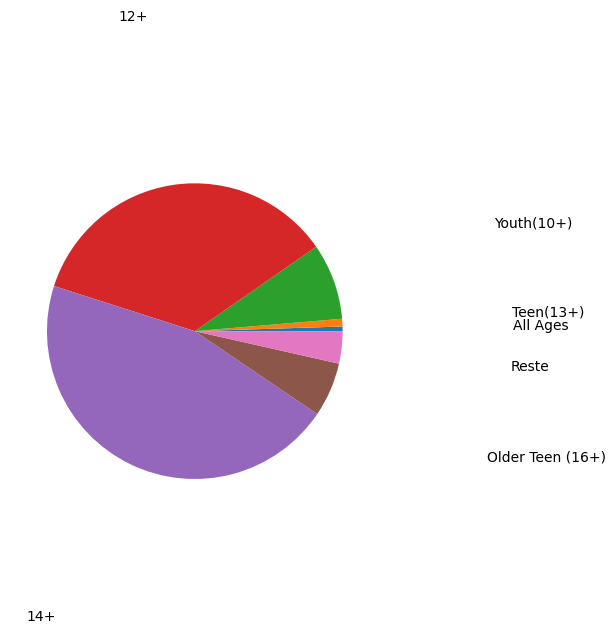

In [2]:
# library
import matplotlib.pyplot as plt


TotalScan = 7251
AllAges = round(36 / TotalScan * 100, 2)
Youth10 = round((11 + 593) / TotalScan * 100, 2)
Teen12 = round(2566 / TotalScan * 100, 2)
Teen13 = round(61 / TotalScan * 100, 2)
Teen14 = round(3297 / TotalScan * 100, 2)
Teen16 = round((18 + 413) / TotalScan * 100, 2)

print("% pour AllAges : ", AllAges)
print("% pour Youth10 : ", Youth10)
print("% pour Teen12 : ", Teen12)
print("% pour Teen13 : ", Teen13)
print("% pour Teen14 : ", Teen14)
print("% pour Teen16 : ", Teen16)

Total = AllAges + Youth10 + Teen12 + Teen13 + Teen14 + Teen16
Reste = round(100 - Total, 2)
arr = [AllAges,Teen13, Youth10, Teen12,  Teen14, Teen16, Reste]

print("% pour No Data : ", Reste)



    
# create random data
names=['All Ages', 'Teen(13+)', 'Youth(10+)','12+', '14+','Older Teen (16+)','Reste']
labels = names

#plt.pie(Total)

# Label distance: gives the space between labels and the center of the pie
plt.pie(arr, labels=labels, labeldistance=2.15);
plt.show();

In [4]:
import numpy as np
np.isnan(result)

array([], dtype=bool)